In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import socceraction

from statsbombpy import sb

In [2]:
from socceraction.data.statsbomb import StatsBombLoader

path = 'D:\Football Data Science\Data\Event\Statsbomb\data'

api = StatsBombLoader(getter="local", root=path)

df_games = [api.games(competition_id=9, season_id=27)['game_id'], # 德甲2015/2016赛季
            api.games(competition_id=11, season_id=27)['game_id'], # 西甲2015/2016赛季
            api.games(competition_id=7, season_id=27)['game_id'], # 法甲2015/2016赛季
            api.games(competition_id=2, season_id=27)['game_id'],  # 英超2015/2016赛季
            api.games(competition_id=12, season_id=27)['game_id']] # 意甲2015/2016赛季

### New Model

In [3]:
X_Bundesliga = pd.read_csv('data/X_1516_Bundesliga.csv', index_col=0)
X_LaLiga = pd.read_csv('data/X_1516_LaLiga.csv', index_col=0)
X_Ligue1 = pd.read_csv('data/X_1516_Ligue1.csv', index_col=0)
X_PremierLeague = pd.read_csv('data/X_1516_PremierLeague.csv', index_col=0)
X_SerieA = pd.read_csv('data/X_1516_SerieA.csv', index_col=0)

X = pd.concat([X_Bundesliga, X_LaLiga, X_Ligue1, X_PremierLeague, X_SerieA], ignore_index=True)
X

,period_id_a0,time_seconds_a0,time_seconds_overall_a0,period_id_a1,time_seconds_a1,time_seconds_overall_a1,period_id_a2,time_seconds_a2,time_seconds_overall_a2,team_1,...,dy_a2,goalscore_team,goalscore_opponent,goalscore_diff,actiontype_a0,actiontype_a1,actiontype_a2,bodypart_a0,bodypart_a1,bodypart_a2
0,1,0.4820,0.4820,1,0.4820,0.4820,1,0.4820,0.4820,True,...,0.936535,0,0,0,pass,pass,pass,foot,foot,foot
1,1,0.7085,0.7085,1,0.4820,0.4820,1,0.4820,0.4820,True,...,0.936535,0,0,0,receival,pass,pass,foot,foot,foot
2,1,0.9350,0.9350,1,0.7085,0.7085,1,0.4820,0.4820,True,...,0.936535,0,0,0,dribble,receival,pass,foot,foot,foot
3,1,1.0150,1.0150,1,0.9350,0.9350,1,0.7085,0.7085,True,...,0.000000,0,0,0,pass,dribble,receival,foot,foot,foot
4,1,1.5910,1.5910,1,1.0150,1.0150,1,0.9350,0.9350,True,...,-0.436904,0,0,0,receival,pass,dribble,foot,foot,foot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5474172,2,2930.8385,5630.8385,2,2928.5210,5628.5210,2,2927.6690,5627.6690,False,...,1.000000,1,2,-1,interception,pass,dribble,foot,foot,foot
5474173,2,2933.1560,5633.1560,2,2930.8385,5630.8385,2,2928.5210,5628.5210,True,...,-0.542151,1,2,-1,dribble,interception,pass,foot,foot,foot
5474174,2,2935.1310,5635.1310,2,2933.1560,5633.1560,2,2930.8385,5630.8385,True,...,-0.000000,1,2,-1,pass,dribble,interception,foot,foot,foot
5474175,2,2938.2210,5638.2210,2,2935.1310,5635.1310,2,2933.1560,5633.1560,False,...,0.208129,2,1,1,interception,pass,dribble,foot,foot,foot


In [4]:
info_Bundesliga = pd.read_csv('data/info_1516_Bundesliga.csv', index_col=0)
info_LaLiga = pd.read_csv('data/info_1516_LaLiga.csv', index_col=0)
info_Ligue1 = pd.read_csv('data/info_1516_Ligue1.csv', index_col=0)
info_PremierLeague = pd.read_csv('data/info_1516_PremierLeague.csv', index_col=0)
info_SerieA = pd.read_csv('data/info_1516_SerieA.csv', index_col=0)

info = pd.concat([info_Bundesliga, info_LaLiga, info_Ligue1, info_PremierLeague, info_SerieA], ignore_index=True)
info

,game_id,original_event_id,action_id,period_id,time_seconds,team_id,player_id,x,y,dx,dy,type_id,bodypart_id,type_name,bodypart_name
0,3890561,644e16d7-10ca-45f0-8128-fc0055d6f753,0,1,0.4820,175,8387.0,53.33125,33.9575,-0.7000,1.870,0,4,pass,foot_left
1,3890561,644e16d7-10ca-45f0-8128-fc0055d6f753,1,1,0.7085,175,5460.0,52.63125,35.8275,0.0000,0.000,23,0,receival,foot
2,3890561,329a1879-2521-4614-8c68-b4798b0e5d23,2,1,0.9350,175,5460.0,52.63125,35.8275,-0.7000,-0.340,21,0,dribble,foot
3,3890561,77e2ddaf-6de3-49e7-a318-7d765799b543,3,1,1.0150,175,5460.0,51.93125,35.4875,-4.8125,-3.230,0,4,pass,foot_left
4,3890561,77e2ddaf-6de3-49e7-a318-7d765799b543,4,1,1.5910,175,6039.0,47.11875,32.2575,0.0000,0.000,23,0,receival,foot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5474172,3878540,71006080-9dd2-401c-b02f-d8f8947644c5,3306,2,2930.8385,240,7174.0,12.64375,33.4475,-0.0000,-0.000,24,0,interception,foot
5474173,3878540,34beca91-bdec-408c-81d3-d423e74ec518,3307,2,2933.1560,240,7174.0,12.64375,33.4475,9.1875,-1.955,21,0,dribble,foot
5474174,3878540,7c4c3eae-84c0-4da0-baa4-e87d11376565,3308,2,2935.1310,240,7174.0,21.83125,31.4925,42.4375,-9.180,0,5,pass,foot_right
5474175,3878540,d4d557ff-725e-4cfa-afee-e14fa9e3ed4b,3309,2,2938.2210,236,7778.0,40.73125,45.6875,0.0000,0.000,24,0,interception,foot


In [5]:
import joblib

model_score = joblib.load('data/model_score.dat')
model_concede = joblib.load('data/model_concede.dat')

categorical_features = ['period_id_a0', 'period_id_a1', 'period_id_a2', 'actiontype_a0', 'actiontype_a1', 'actiontype_a2', 'bodypart_a0', 'bodypart_a1', 'bodypart_a2']
for col in categorical_features:
    if X[col].dtype != 'category':
        # print(col, X[col].dtype)
        X[col] = X[col].astype('category')
        
Y_hat = pd.DataFrame({'scores': model_score.predict_proba(X)[:,1], 'concedes': model_concede.predict_proba(X)[:,1]})

import socceraction.atomic.vaep.formula as vaepformula

values = pd.DataFrame(columns=['offensive_value', 'defensive_value', 'vaep_value'], index=Y_hat.index)

inds = info.groupby('game_id').indices # dict of game_id:indices
for game_id, game_inds in inds.items():
    info0 = info.loc[game_inds]
    Y_hat0 = Y_hat.loc[game_inds]
    value0 = vaepformula.value(info0, Y_hat0["scores"], Y_hat0["concedes"]) # 对于开球那下动作没有做处理，但确实也没必要
    values.loc[game_inds] = value0
    
values['player_id'] = info['player_id'].astype(int)
values

,offensive_value,defensive_value,vaep_value,player_id
0,0.0,-0.0,0.0,8387
1,-0.000008,-0.000062,-0.00007,5460
2,0.000025,0.000019,0.000045,5460
3,0.000086,-0.00001,0.000076,5460
4,-0.000085,0.000065,-0.00002,6039
...,...,...,...,...
5474172,0.000565,0.020412,0.020978,7174
5474173,0.001372,0.001118,0.00249,7174
5474174,0.001457,-0.00016,0.001297,7174
5474175,0.001817,0.002223,0.00404,7778


In [6]:
players = []
for game_id, game_inds in inds.items():
    player0 = api.players(game_id=game_id)[['player_id', 'player_name', 'nickname', 'minutes_played', 'starting_position_name']]
    player0['player_name'] = player0.apply(lambda row: row['nickname'] if pd.notna(row['nickname']) else row['player_name'], axis=1)
    player0.drop('nickname', axis=1)
    players.append(player0)
players = pd.concat(players, ignore_index=True)

get_position = lambda x: [''.join([c for c in pos if c.isupper()]) for pos in dict.fromkeys(x) if pos != 'Substitute']
players_sum = players.groupby(['player_id', 'player_name']).agg({'starting_position_name': get_position,
                                                                 'minutes_played': sum}).reset_index()
# players_sum['player_id'].duplicated().sum() # 检查是否出现同id不同名的情况
players_sum

,player_id,player_name,starting_position_name,minutes_played
0,2936,Christophe Kerbrat,[RCB],2722
1,2943,Lucas Deaux,"[LCB, CDM, RDM, LDM]",1250
2,2944,Benjamin Corgnet,"[CAM, LW, LM]",593
3,2946,Frédéric Guilbert,"[RB, RCB]",2537
4,2947,Anthony Lopes,[G],3500
...,...,...,...,...
2636,403310,Ilias Hassani,[],19
2637,403377,Stéphan Raheriharimanana,[RDM],81
2638,403378,Antony Ranieri,[],13
2639,403390,Jean Ambrose,[],1


In [7]:
from scipy.stats import pearsonr, spearmanr

pearsons, spearmans = [], []

for i in range(100):
    np.random.seed(i)
    split = np.random.binomial(1, 0.5, len(info))
    values_0, values_1 = values[split == 1], values[split == 0]
    results = []

    for value in [values_0, values_1]:
        values_agg = value.groupby('player_id').agg({'vaep_value':['sum','mean']}).reset_index()
        values_agg.columns = ['player_id', 'vaep_total', 'vaep_per_action']
        
        result = pd.merge(values_agg, players_sum, how='left') # 有些球员出现在players里但没有出现在values里，可能是因为没碰过球
        result = result[result['minutes_played'] >= 900] # 只筛选踢满10场联赛及以上的
        result['vaep_per_90'] = result['vaep_total'] / result['minutes_played'] * 90

        results.append(result)
        
    split_results = pd.merge(results[0][['player_name', 'vaep_per_90']], results[1][['player_name', 'vaep_per_90']], on='player_name')
    split_results['vaep_per_90_x'] = pd.to_numeric(split_results['vaep_per_90_x'])
    split_results['vaep_per_90_y'] = pd.to_numeric(split_results['vaep_per_90_y'])

    r1, p1 = pearsonr(split_results['vaep_per_90_x'], split_results['vaep_per_90_y'])
    r2, p2 = spearmanr(split_results['vaep_per_90_x'], split_results['vaep_per_90_y'])
    
    pearsons.append(r1)
    spearmans.append(r2)
    
    if i % 10 == 0: print(i)

pearsons, spearmans = np.array(pearsons), np.array(spearmans)
pearsons.mean(), spearmans.mean()

0
10
20
30
40
50
60
70
80
90


(0.6395172845806306, 0.5780604610910943)

### Old Model

In [8]:
X = pd.read_csv('data/X_all_old.csv', index_col=0)
Y = pd.read_csv('data/Y_all_old.csv', index_col=0)
atomic_actions = pd.read_csv('data/atomic_actions_all.csv', index_col=0)

X.shape, Y.shape, atomic_actions.shape

((5474178, 148), (5474178, 2), (5474178, 15))

In [9]:
to_delete_type = ['actiontype_keeper_pick_up_a0', 'actiontype_non_action_a0', 'actiontype_corner_a0', 'actiontype_freekick_a0',
                  'actiontype_keeper_pick_up_a1', 'actiontype_non_action_a1', 'actiontype_corner_a1', 'actiontype_freekick_a1',
                  'actiontype_keeper_pick_up_a2', 'actiontype_non_action_a2', 'actiontype_corner_a2', 'actiontype_freekick_a2']
X = X.drop(columns=to_delete_type) # 删掉这些完全没有的动作类型

X['actiontype_a0'] = X.loc[:, 'actiontype_pass_a0':'actiontype_red_card_a0'].idxmax(axis=1).str.lstrip('actiontype').str.rstrip('a0').str.strip('_')
X['actiontype_a1'] = X.loc[:, 'actiontype_pass_a1':'actiontype_red_card_a1'].idxmax(axis=1).str.lstrip('actiontype').str.rstrip('a1').str.strip('_')
X['actiontype_a2'] = X.loc[:, 'actiontype_pass_a2':'actiontype_red_card_a2'].idxmax(axis=1).str.lstrip('actiontype').str.rstrip('a2').str.strip('_')
X = X.loc[:, 'bodypart_foot_a0':] # 重新转换为分类变量

X = X.drop(columns=['bodypart_head/other_a0', 'bodypart_head/other_a1', 'bodypart_head/other_a2']) # 删除多余类别head/other

X['bodypart_a0'] = X.loc[:, 'bodypart_foot_a0':'bodypart_other_a0'].idxmax(axis=1).str.lstrip('bodypart').str.rstrip('a0').str.strip('_')
X['bodypart_a1'] = X.loc[:, 'bodypart_foot_a1':'bodypart_other_a1'].idxmax(axis=1).str.lstrip('bodypart').str.rstrip('a1').str.strip('_')
X['bodypart_a2'] = X.loc[:, 'bodypart_foot_a2':'bodypart_other_a2'].idxmax(axis=1).str.lstrip('bodypart').str.rstrip('a2').str.strip('_')
X = X.loc[:, 'period_id_a0':] # 重新转换为分类变量

X['period_id_a0'] = X['period_id_a0'].astype(int)
X['period_id_a1'] = X['period_id_a1'].astype(int)
X['period_id_a2'] = X['period_id_a2'].astype(int)

categorical_features = ['period_id_a0', 'period_id_a1', 'period_id_a2', 'actiontype_a0', 'actiontype_a1', 'actiontype_a2', 'bodypart_a0', 'bodypart_a1', 'bodypart_a2']
for col in categorical_features:
    if X[col].dtype != 'category':
        # print(col, X[col].dtype)
        X[col] = X[col].astype('category')

X

,period_id_a0,time_seconds_a0,time_seconds_overall_a0,period_id_a1,time_seconds_a1,time_seconds_overall_a1,period_id_a2,time_seconds_a2,time_seconds_overall_a2,team_1,...,dy_a2,goalscore_team,goalscore_opponent,goalscore_diff,actiontype_a0,actiontype_a1,actiontype_a2,bodypart_a0,bodypart_a1,bodypart_a2
0,1,0.4820,0.4820,1,0.4820,0.4820,1,0.4820,0.4820,True,...,0.936535,0,0,0,pass,pass,pass,foot,foot,foot
1,1,0.7085,0.7085,1,0.4820,0.4820,1,0.4820,0.4820,True,...,0.936535,0,0,0,receival,pass,pass,foot,foot,foot
2,1,0.9350,0.9350,1,0.7085,0.7085,1,0.4820,0.4820,True,...,0.936535,0,0,0,dribble,receival,pass,foot,foot,foot
3,1,1.0150,1.0150,1,0.9350,0.9350,1,0.7085,0.7085,True,...,0.000000,0,0,0,pass,dribble,receival,foot,foot,foot
4,1,1.5910,1.5910,1,1.0150,1.0150,1,0.9350,0.9350,True,...,-0.436904,0,0,0,receival,pass,dribble,foot,foot,foot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5474173,2,2930.8385,5630.8385,2,2928.5210,5628.5210,2,2927.6690,5627.6690,False,...,1.000000,1,2,-1,interception,pass,dribble,foot,foot,foot
5474174,2,2933.1560,5633.1560,2,2930.8385,5630.8385,2,2928.5210,5628.5210,True,...,-0.542151,1,2,-1,dribble,interception,pass,foot,foot,foot
5474175,2,2935.1310,5635.1310,2,2933.1560,5633.1560,2,2930.8385,5630.8385,True,...,-0.000000,1,2,-1,pass,dribble,interception,foot,foot,foot
5474176,2,2938.2210,5638.2210,2,2935.1310,5635.1310,2,2933.1560,5633.1560,False,...,0.208129,2,1,1,interception,pass,dribble,foot,foot,foot


In [10]:
import joblib

model_score = joblib.load('data/model_score_old.dat')
model_concede = joblib.load('data/model_concede_old.dat')

categorical_features = ['period_id_a0', 'period_id_a1', 'period_id_a2', 'actiontype_a0', 'actiontype_a1', 'actiontype_a2', 'bodypart_a0', 'bodypart_a1', 'bodypart_a2']
for col in categorical_features:
    if X[col].dtype != 'category':
        # print(col, X[col].dtype)
        X[col] = X[col].astype('category')
        
Y_hat = pd.DataFrame({'scores': model_score.predict_proba(X)[:,1], 'concedes': model_concede.predict_proba(X)[:,1]})

import socceraction.atomic.vaep.formula as vaepformula

values = pd.DataFrame(columns=['offensive_value', 'defensive_value', 'vaep_value'], index=Y_hat.index)

info = atomic_actions
inds = info.groupby('game_id').indices # dict of game_id:indices
for game_id, game_inds in inds.items():
    info0 = info.loc[game_inds]
    Y_hat0 = Y_hat.loc[game_inds]
    value0 = vaepformula.value(info0, Y_hat0["scores"], Y_hat0["concedes"]) # 对于开球那下动作没有做处理，但确实也没必要
    values.loc[game_inds] = value0
    
values['player_id'] = info['player_id'].astype(int)
values

,offensive_value,defensive_value,vaep_value,player_id
0,0.0,-0.0,0.0,8387
1,0.000021,0.000057,0.000078,5460
2,-0.000024,-0.000029,-0.000053,5460
3,0.000053,-0.000042,0.000011,5460
4,0.000101,0.000041,0.000142,6039
...,...,...,...,...
5474173,-0.000006,0.022152,0.022145,7174
5474174,0.000217,0.00075,0.000967,7174
5474175,0.001573,0.00022,0.001793,7174
5474176,0.00256,0.000693,0.003253,7778


In [11]:
from scipy.stats import pearsonr, spearmanr

pearsons_old, spearmans_old = [], []

for i in range(100):
    np.random.seed(i)
    split = np.random.binomial(1, 0.5, len(info))
    values_0, values_1 = values[split == 1], values[split == 0]
    results = []

    for value in [values_0, values_1]:
        values_agg = value.groupby('player_id').agg({'vaep_value':['sum','mean']}).reset_index()
        values_agg.columns = ['player_id', 'vaep_total', 'vaep_per_action']
        
        result = pd.merge(values_agg, players_sum, how='left') # 有些球员出现在players里但没有出现在values里，可能是因为没碰过球
        result = result[result['minutes_played'] >= 900] # 只筛选踢满10场联赛及以上的
        result['vaep_per_90'] = result['vaep_total'] / result['minutes_played'] * 90

        results.append(result)
        
    split_results = pd.merge(results[0][['player_name', 'vaep_per_90']], results[1][['player_name', 'vaep_per_90']], on='player_name')
    split_results['vaep_per_90_x'] = pd.to_numeric(split_results['vaep_per_90_x'])
    split_results['vaep_per_90_y'] = pd.to_numeric(split_results['vaep_per_90_y'])

    r1, p1 = pearsonr(split_results['vaep_per_90_x'], split_results['vaep_per_90_y'])
    r2, p2 = spearmanr(split_results['vaep_per_90_x'], split_results['vaep_per_90_y'])
    
    pearsons_old.append(r1)
    spearmans_old.append(r2)
    
    if i % 10 == 0: print(i)
    
pearsons_old, spearmans_old = np.array(pearsons_old), np.array(spearmans_old)
pearsons_old.mean(), spearmans_old.mean()

0
10
20
30
40
50
60
70
80
90


(0.6035942439440596, 0.5251693855050138)

### Comparison

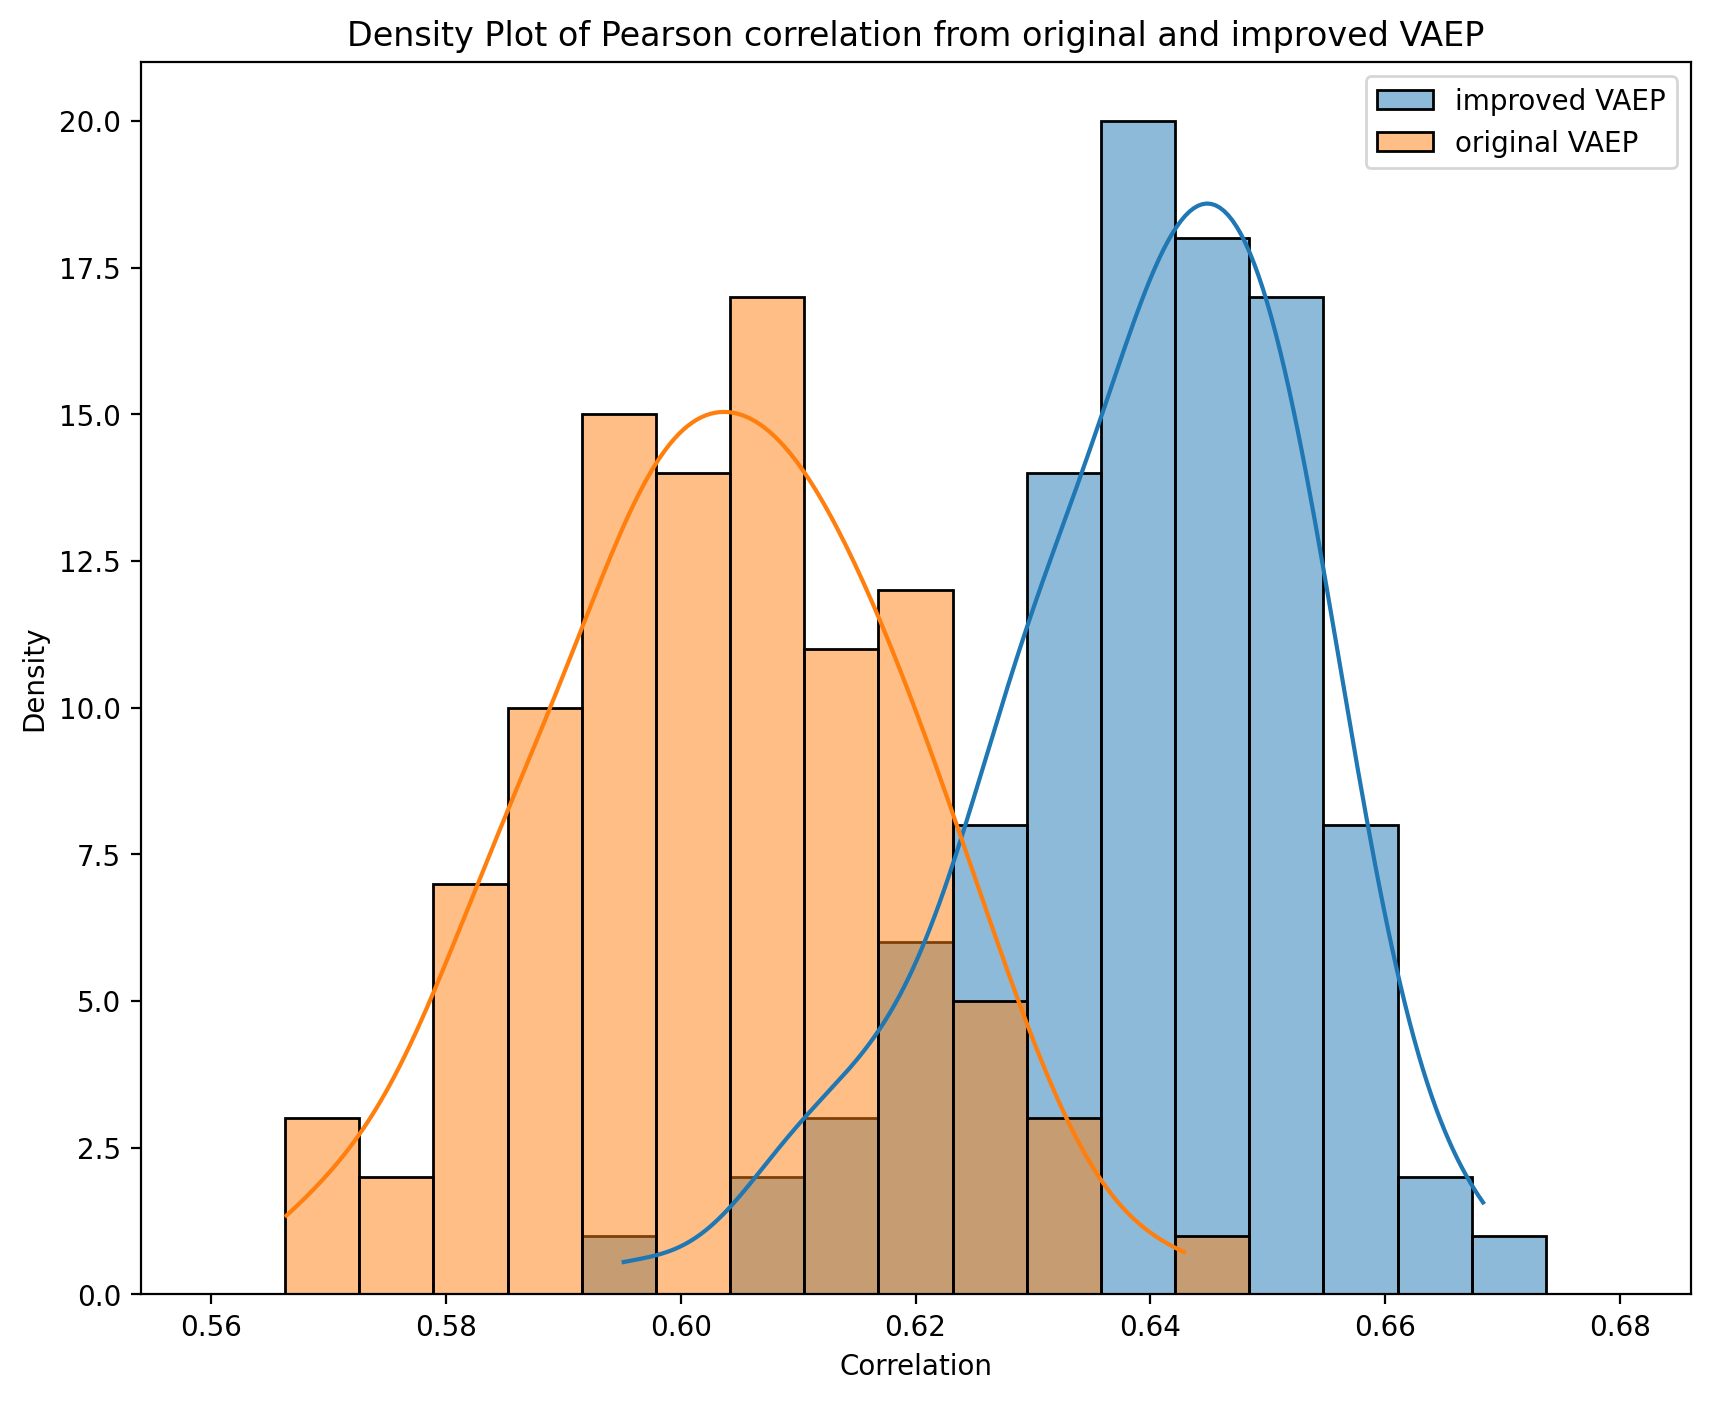

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(dpi=200, figsize=(10,8))

bins = np.linspace(0.56, 0.68, 20)
sns.histplot(data=pearsons, bins=bins, kde=True, label='improved VAEP')
sns.histplot(data=pearsons_old, bins=bins, kde=True, label='original VAEP')

plt.legend()
plt.title('Density Plot of Pearson correlation from original and improved VAEP')
plt.xlabel('Correlation')
plt.ylabel('Density')
plt.show()

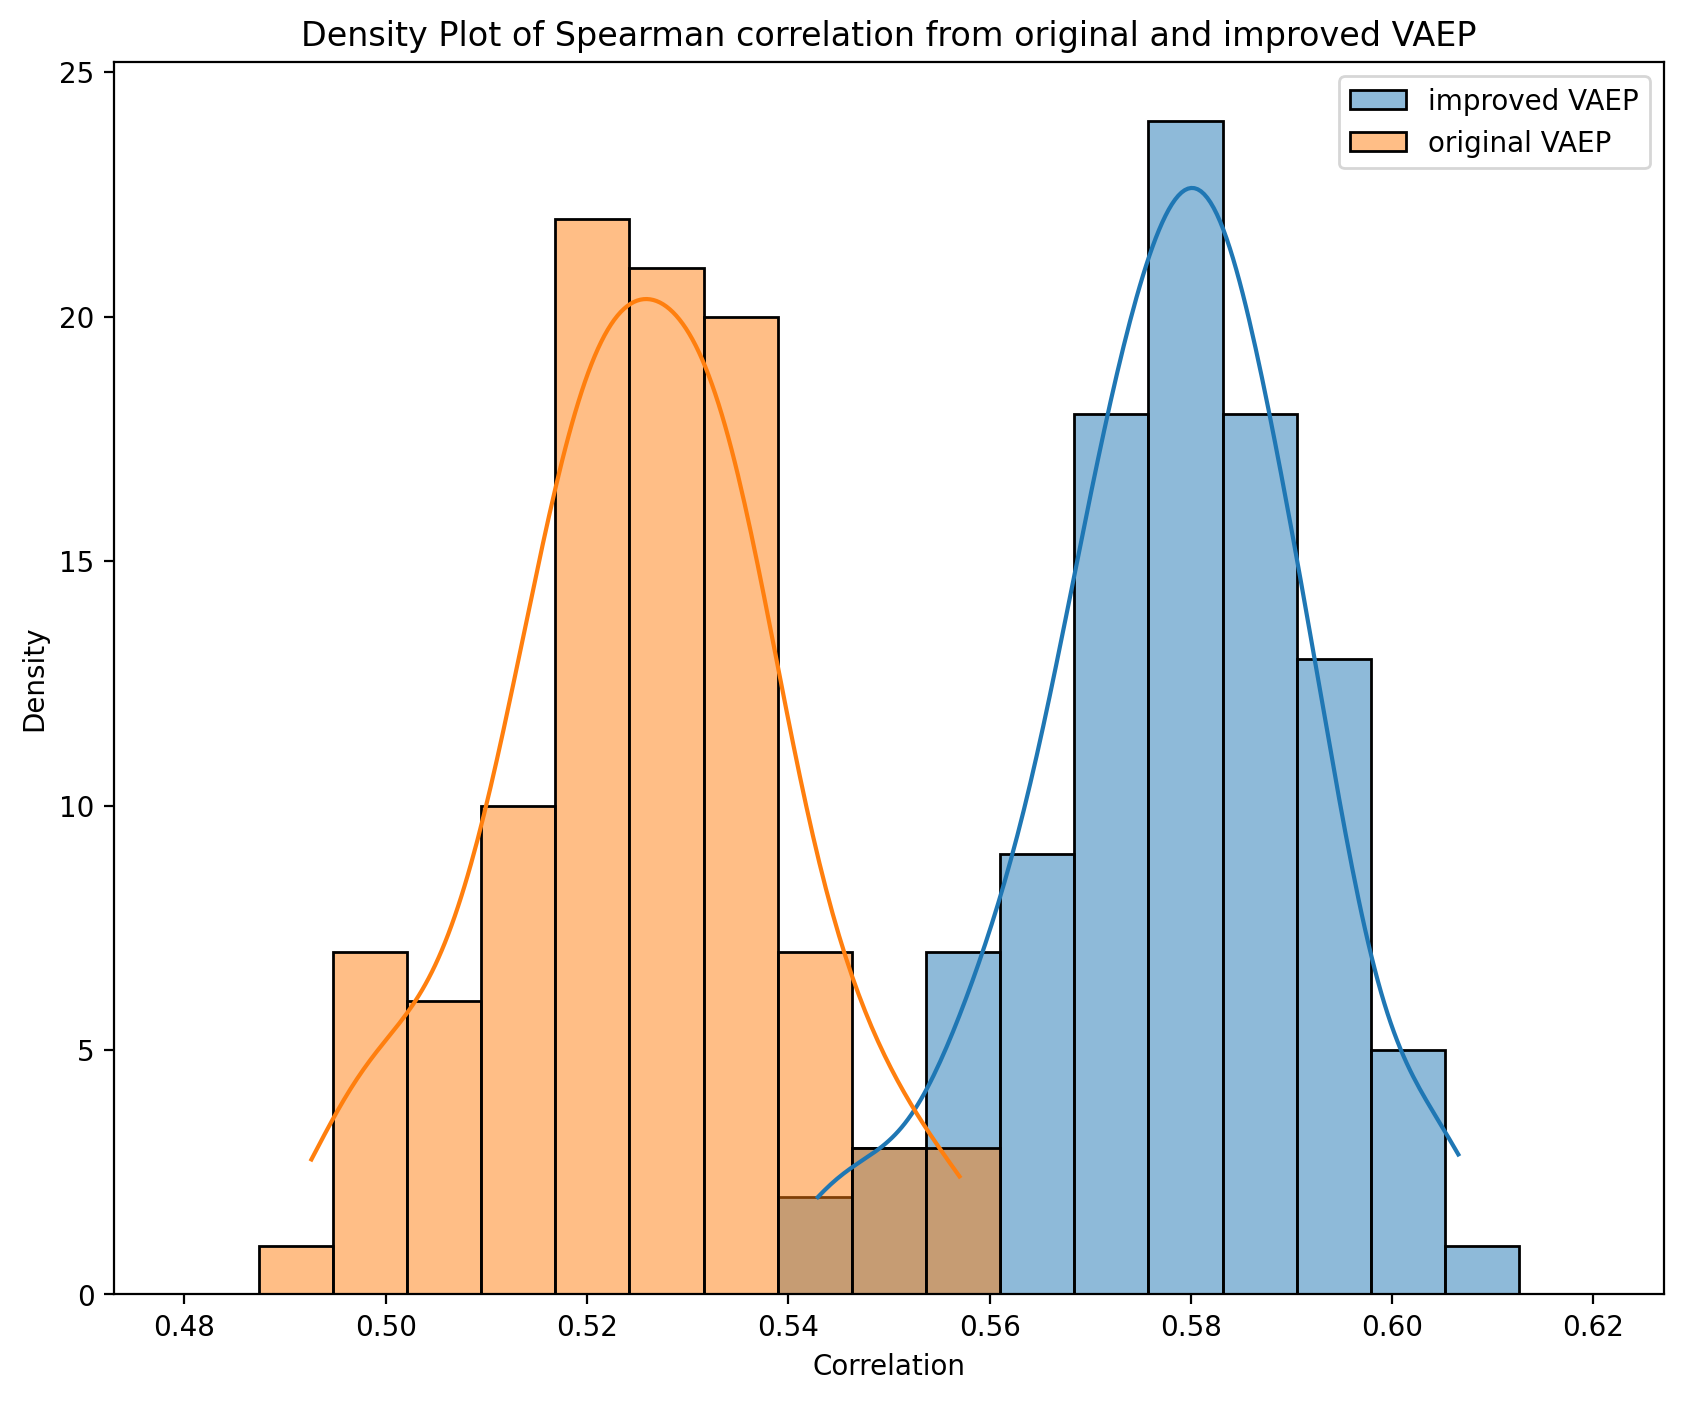

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(dpi=200, figsize=(10,8))

bins = np.linspace(0.48, 0.62, 20)
sns.histplot(data=spearmans, bins=bins, kde=True, label='improved VAEP')
sns.histplot(data=spearmans_old, bins=bins, kde=True, label='original VAEP')

plt.legend()
plt.title('Density Plot of Spearman correlation from original and improved VAEP')
plt.xlabel('Correlation')
plt.ylabel('Density')
plt.show()